# Exercice 1 - Clustering - Prédiction des nombres

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.cluster import KMeans

In [2]:
data = load_digits()
X = data['data']

In [3]:
X.shape

(1797, 64)

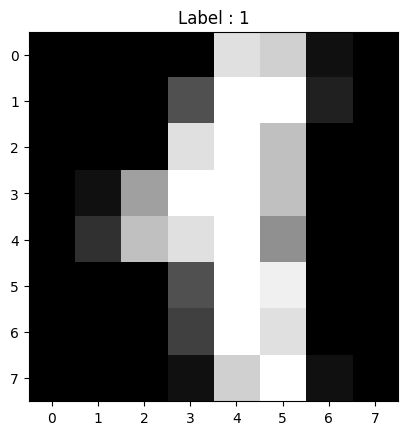

In [4]:
plt.imshow(data.images[11], cmap='gray')
plt.title(f"Label : {data.target[11]}")
plt.show()

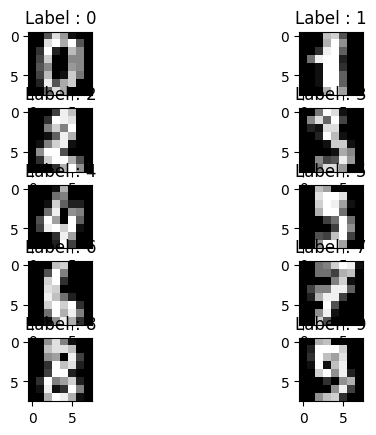

In [5]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label : {data.target[i]}")

plt.show()


In [6]:
kmeans = KMeans(n_clusters=10)
kmeans.fit_predict(X)


array([5, 1, 1, ..., 1, 6, 6], dtype=int32)

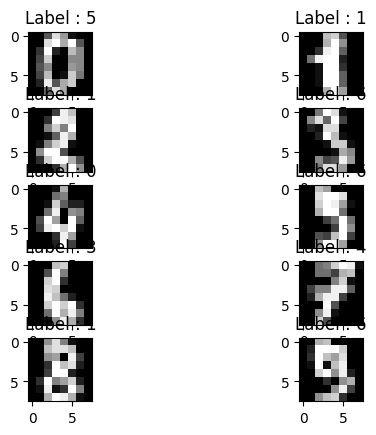

In [7]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label : {kmeans.labels_[i]}")

plt.show()

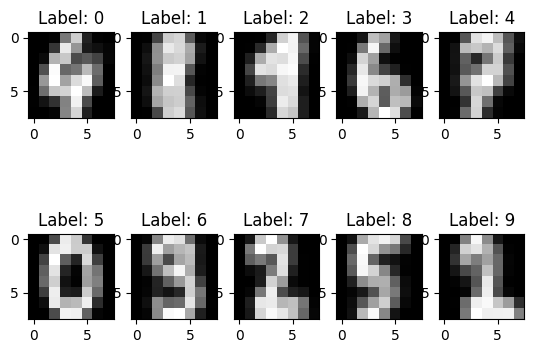

In [8]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(8,8), cmap='gray')
    plt.title(f"Label: {i}")

plt.show()

# Exercice 2 : Clustering - Recherche du paramètre k optimal


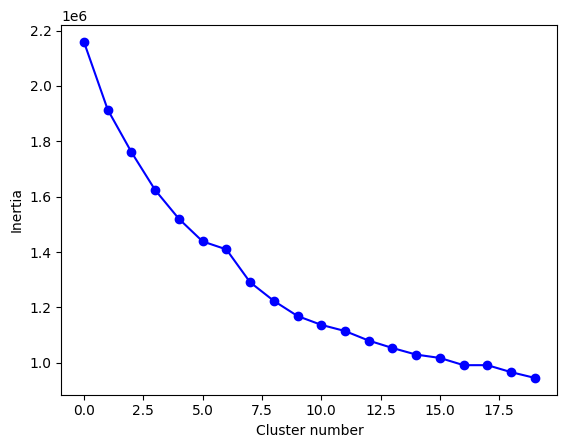

In [9]:
from scipy.spatial.distance import cdist

def get_inertia_plot(dataset, max_cluster):
    inertia_list = []

    for i in range(max_cluster):
        kmeans = KMeans(n_clusters=i+1)
        kmeans.fit_predict(dataset)
        inertia_list.append(kmeans.inertia_)

    plt.figure()
    plt.ylabel('Inertia')
    plt.xlabel('Cluster number')
    plt.plot(inertia_list, 'bo-')

    return inertia_list


inertias = get_inertia_plot(X, 20)



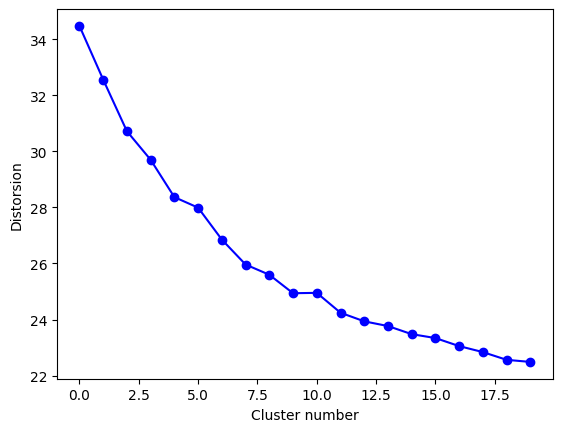

In [10]:
from scipy.spatial.distance import cdist

def get_distorsion_plot(dataset, max_clusters):
    distorsion_list = []

    for i in range(max_clusters):
        kmeans = KMeans(n_clusters=i+1)
        kmeans.fit_predict(dataset)
        distorsion = np.mean(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1))
        distorsion_list.append(distorsion)

    plt.figure()
    plt.ylabel('Distorsion')
    plt.xlabel('Cluster number')
    plt.plot(distorsion_list, 'bo-')

    return distorsion_list

distorsions = get_distorsion_plot(X, 20)

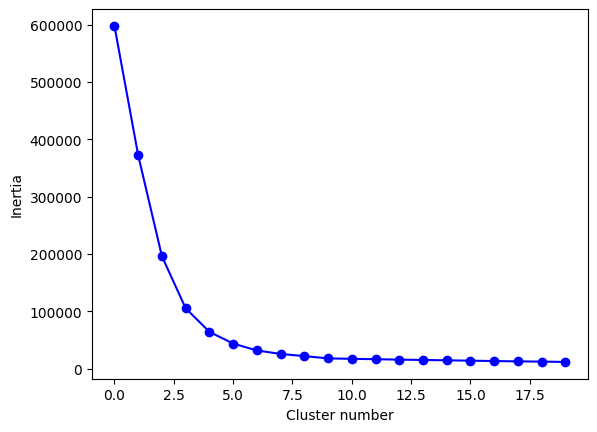

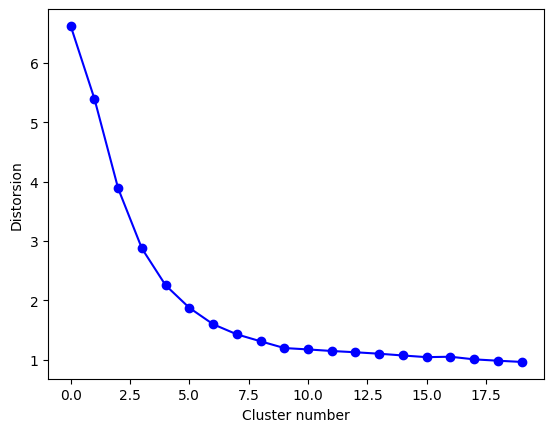

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10000, centers=10, n_features=2, random_state=0)

inertias = get_inertia_plot(X, 20)
distorsions = get_distorsion_plot(X, 20)

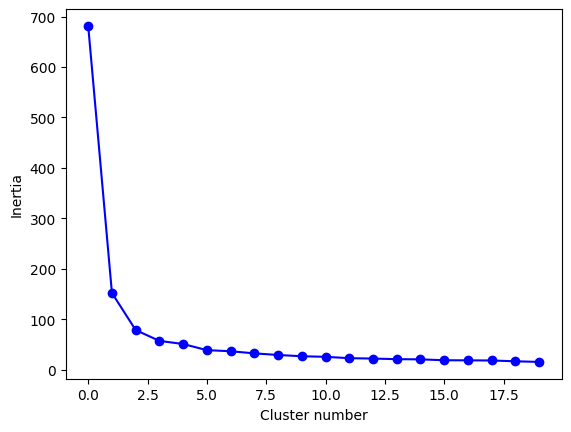

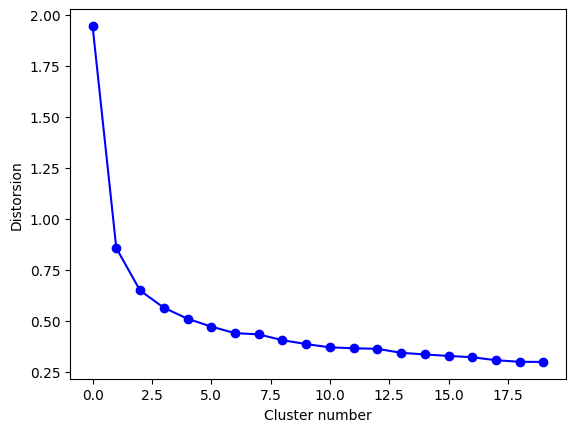

In [12]:
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']

inertias = get_inertia_plot(X, 20)
distorsions = get_distorsion_plot(X, 20)

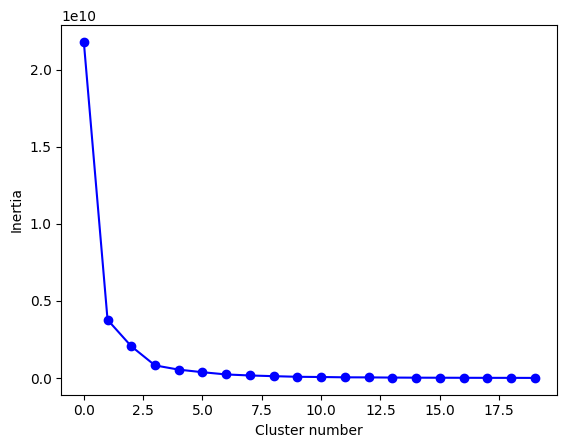

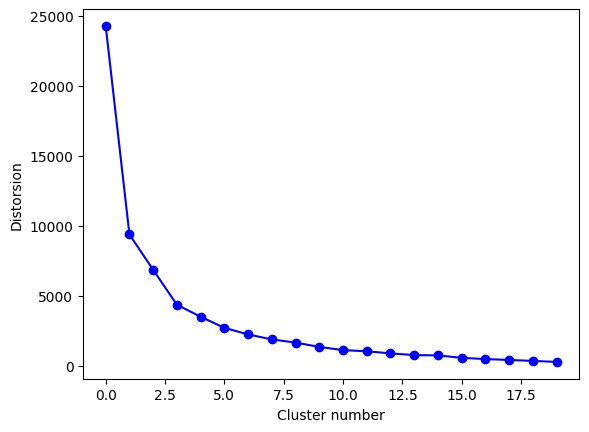

In [13]:
df = pd.read_csv('Salary_Data.csv')

inertias = get_inertia_plot(df, 20)
distorsions = get_distorsion_plot(df, 20)

# Exercice 5 - Clustering - Autres méthodes de clustering

In [17]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=2, n_repeated=0, random_state=1)


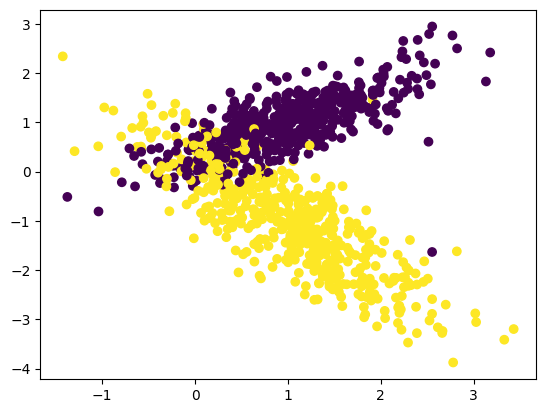

In [18]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)

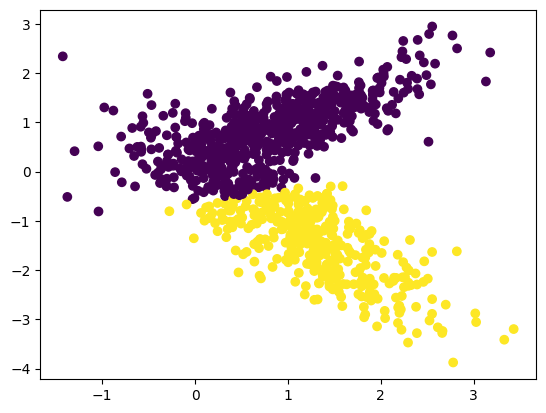

In [19]:
# KMeans
kmeans = KMeans(n_clusters=2)
target = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=target)

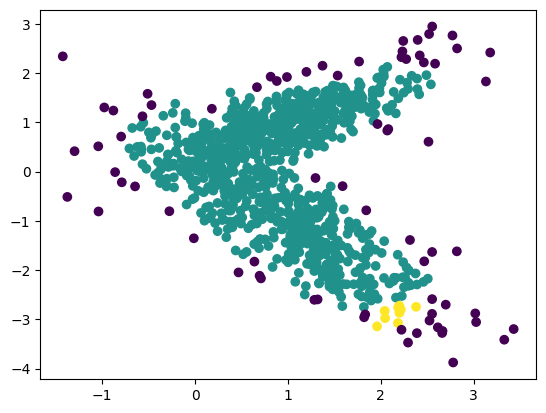

In [20]:
# DBScan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2)
dbscan_target = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_target)

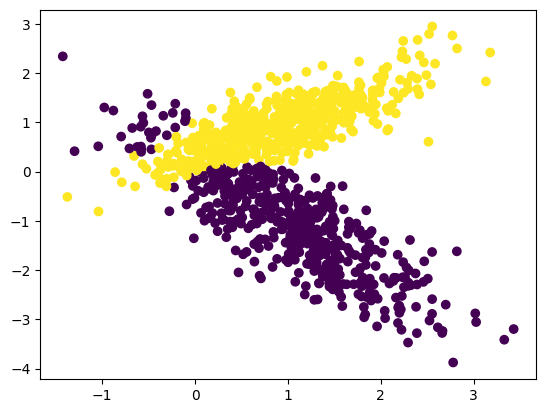

In [21]:
# GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm_target = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=gmm_target)